# <font color="blue">2.DecisionTree</font>
## 1) 데이터 수집
- 데이터는 UCI Machine Learning Repisitory의 Estimation of obesity levels based on eating habits and physical condition Data Set
을 사용하였다.(https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)
- 해당 데이터는 식습관과 신체 상태, 및 다양한 지표를 통하여 멕시코, 페루, 콜롬비아 국가에서 개인의 비만 수준을 추정하기 위한 데이터이다. 비만 수준은 저체중, 정상 체중, 과체중I, 과체중II, 비만I, 비만II, 비만III 으로 나뉜다. 

## 2) 데이터 전처리

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import random
import sys
import sklearn.metrics as mt 
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz/bin'
import graphviz 
import seaborn as sns

- Gender : 성별
- Age : 나이 
- Height : 키(continuous)
- Weight : 몸무게 (continuous)
- family_history_with_overweight : 가족중 과체중 문제를 겪은 사람이 존재하는지 (yes, no)
- FAVC : 고칼로리 음식을 자주 섭취하는지 (yes, no)
- FCVC : 야채를 자주 먹는정도 (0 ~ 3)
- NCP : 주식을 먹는 횟수 (0 ~ 3)
- CAEC : 식사 사이에 음식을 섭취하는 빈도('Sometimes' 'Frequently' 'Always' 'no')
- CH20 : 물을 하루에 얼마나 마시는지(continuous)
- CALC : 술을 자주 마시는지 ('no' 'Sometimes' 'Frequently' 'Always')
- SCC : 칼로리 소모 (yes, no)
- FAF : 신체활동 빈도 (continuous)
- TUE : 기술장치 사용시간 (continuous)
- MTRANS : 주로 사용하는 이동수단 ('Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike')
- NObeyesdad : 비만도 (target)

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', sep=',')
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

범주형 데이터의 값들을 확인

In [4]:
print(df['family_history_with_overweight'].unique())
print(df['FAVC'].unique())
print(df['CAEC'].unique())
print(df['SMOKE'].unique())
print(df['SCC'].unique()) 
print(df['CALC'].unique())
print(df['MTRANS'].unique())
print(df['NObeyesdad'].unique())


['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


- 해당 데이터에서 대부분의 범주형 변수는 그 값이 참 혹은 거짓이므로 이러한 데이터는 간단하게 참이면 1, 거짓이면 0으로 바꾸어준다.  
- CAEC, CALC 변수의 경우 순서가 존재하므로, ordinary 인코딩을 진행한다
- MTRANS 변수의 경우 순서가 존재하지 않으므로 one-hot 인코딩을 진행한다.
- NObeyesdad 는 범주가 너무 많아 저체중, 정상체중, 과체중, 비만으로 다시 범주화 한다.

In [5]:
df = df.replace({'Gender': {'Male':0,'Female':1}})
df = df.replace({'family_history_with_overweight': {'no':0,'yes':1}})
df = df.replace({'SMOKE': {'no':0,'yes':1}})
df = df.replace({'FAVC': {'no':0,'yes':1}})
df = df.replace({'SCC': {'no':0,'yes':1}})
df = df.replace({'CAEC': {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}})
df = df.replace({'CALC': {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}})
df = df.replace({'NObeyesdad': {'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':2,
 'Obesity_Type_I':3, 'Obesity_Type_II':3, 'Obesity_Type_III':3}})

df = pd.get_dummies(df, columns = ['MTRANS'])

df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,...,0.045476,1.010298,0.657866,0.731407,2.066793,0.216485,0.003316,0.005211,0.748460,0.026528
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,...,0.208395,0.850592,0.608927,0.515498,1.052549,0.411946,0.057502,0.072015,0.434001,0.160737
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,...,0.000000,0.124505,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,...,0.000000,1.000000,0.625350,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,...,0.000000,1.666678,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,...,1.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


기존 연속형 변수들에 대한 boxPlot은 다음과 같다

Text(0.5, 1.0, 'TUE')

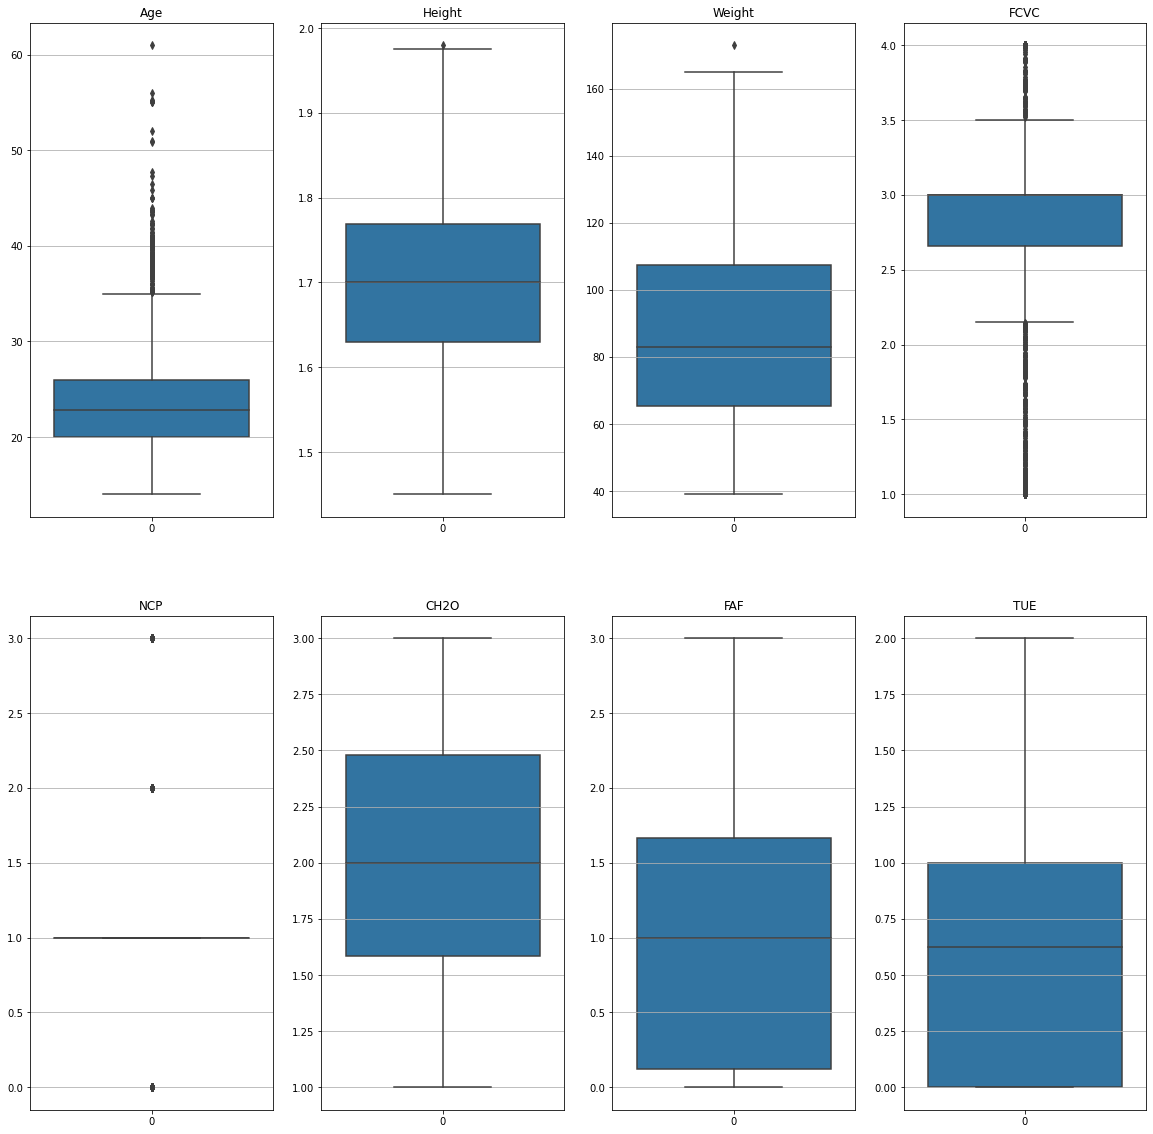

In [8]:

fig, axes = plt.subplots(2, 4)

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

sns.boxplot(data=df.iloc[:,1], ax = axes[0,0])
sns.boxplot(data=df.iloc[:,2], ax = axes[0,1])
sns.boxplot(data=df.iloc[:,3], ax = axes[0,2])
sns.boxplot(data=df.iloc[:,7], ax = axes[0,3])
sns.boxplot(data=df.iloc[:,8], ax = axes[1,0])
sns.boxplot(data=df.iloc[:,10], ax = axes[1,1])
sns.boxplot(data=df.iloc[:,12], ax = axes[1,2])
sns.boxplot(data=df.iloc[:,13], ax = axes[1,3])

axes[0,0].set_title("Age")
axes[0,1].set_title("Height")
axes[0,2].set_title("Weight")
axes[0,3].set_title("FCVC")
axes[1,0].set_title("NCP")
axes[1,1].set_title("CH2O")
axes[1,2].set_title("FAF")
axes[1,3].set_title("TUE")

# sns.boxplot(data=df.iloc[:,1], ax = axes[0,0])
# sns.boxplot(data=df.iloc[:,1], ax = axes[0,0])
# sns.boxplot(data=df.iloc[:,1], ax = axes[0,0])

**이상치 생성**

In [11]:
y = df['NObeyesdad']
x = df.drop('NObeyesdad',axis=1)
y = pd.DataFrame(y)
x = pd.DataFrame(x)

In [12]:
for i in x:
    Q1 = np.percentile(x[i],25)
    Q3 = np.percentile(x[i],75)
    IQR = Q3 - Q1 #IQR 값을 생성
    
    outlierNum = round(len(x) * random.randrange(3,5) / 100) #3~ 5퍼센트 정도의 이상치를 추가
    flag = random.choice([True,False]) #더하기 빼기를 선택
    
    for j in range(outlierNum):
        row = random.randrange(0,len(x)) #랜덤한 순서에 제공
        if flag:
            x[i][row] = Q3 + (1.5)*IQR*(1+ random.random())
        else:
            x[i][row] = Q1 - (1.5)*IQR*(1+ random.random())

C:\Users\okchr\AppData\Local\Temp/ipykernel_11776/2390476561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i][row] = Q1 - (1.5)*IQR*(1+ random.random())
C:\Users\okchr\AppData\Local\Temp/ipykernel_11776/2390476561.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i][row] = Q3 + (1.5)*IQR*(1+ random.random())


Text(0.5, 1.0, 'TUE')

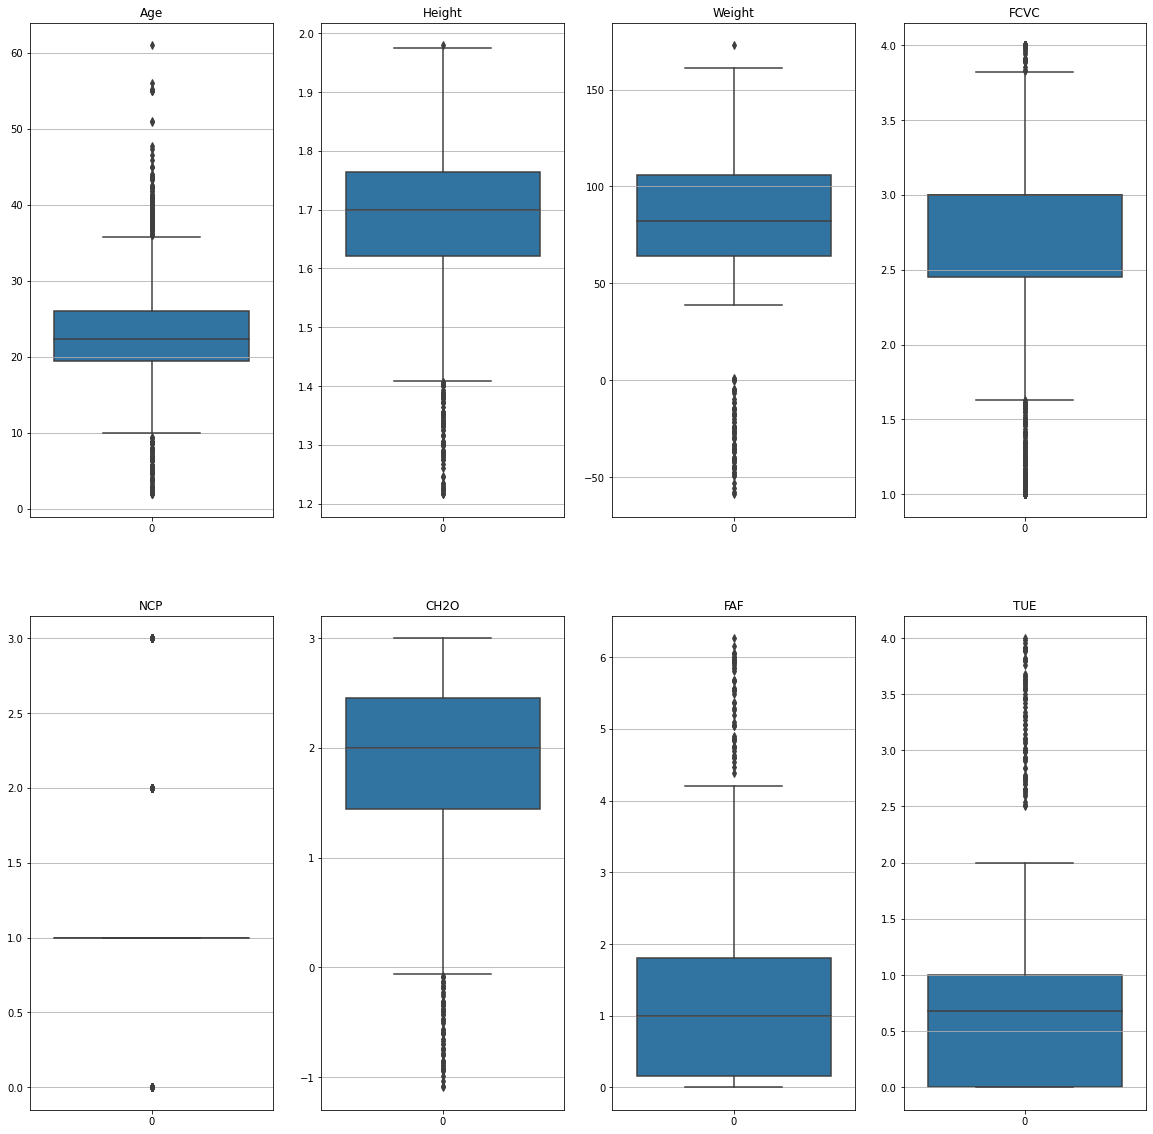

In [13]:
fig, axes = plt.subplots(2, 4)

plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

sns.boxplot(data=x.iloc[:,1], ax = axes[0,0])
sns.boxplot(data=x.iloc[:,2], ax = axes[0,1])
sns.boxplot(data=x.iloc[:,3], ax = axes[0,2])
sns.boxplot(data=x.iloc[:,7], ax = axes[0,3])
sns.boxplot(data=x.iloc[:,8], ax = axes[1,0])
sns.boxplot(data=x.iloc[:,10], ax = axes[1,1])
sns.boxplot(data=x.iloc[:,12], ax = axes[1,2])
sns.boxplot(data=x.iloc[:,13], ax = axes[1,3])

axes[0,0].set_title("Age")
axes[0,1].set_title("Height")
axes[0,2].set_title("Weight")
axes[0,3].set_title("FCVC")
axes[1,0].set_title("NCP")
axes[1,1].set_title("CH2O")
axes[1,2].set_title("FAF")
axes[1,3].set_title("TUE")

## 3) 의사결정 나무 구축 및 실험
### (1) 학습, 테스트 데이터 분리 
train과 test의 비율을 7:3으로 정하고, stratify = y 항목을 추가하여 y label의 비율이 train 

In [14]:
seed = 204059
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=seed,  test_size=0.3,shuffle = True,stratify = y)


### (2) 의사결정 나무 모델 구축

In [15]:
dt_clf = DecisionTreeClassifier(random_state=204059)
dt_clf = dt_clf.fit(x_train, y_train) # 학습

### (3) 실험 및 비교
test data set을 가지고 성능을 비교해보자

In [16]:
y_pred = dt_clf.predict(x_test) 

In [17]:
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average= 'micro')
precision = mt.precision_score(y_test, y_pred, average= 'micro')
f1_score = mt.f1_score(y_test, y_pred, average= 'micro')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9353312302839116 

Accuracy:  0.94 

Recall:  0.94 

Precision:  0.94 

F1_score:  0.94 

Confusion Matrix: 
 [[ 69  13   0   0]
 [  5  73   6   2]
 [  0   3 166   5]
 [  0   0   7 285]]


해당 모델의 Test_Accuracy 는 0.9242902208201893  이다. 

교차 검증을 진행하면 아래와 같다.

In [18]:
# 교차검증

y = df['NObeyesdad']
x = df.drop('NObeyesdad',axis=1)

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.9337378015304807


In [19]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.011939,0.002000,0.813239
1,0.009161,0.000998,0.971564
2,0.009075,0.002088,0.959716
3,0.008627,0.000919,0.947867
4,0.009934,0.001932,0.976303


#### prunning을 진행하여 보자. prunning을 어디까지 제한하여야 할지 모름으로, 각각의 정확도를 비교하여 최적의 max_depth를 찾아보자 

In [20]:
optimal_acc = 0 
optimal_depth = 0

for i in range(1,dt_clf.tree_.max_depth + 1):
    pruned_dt_clf = DecisionTreeClassifier(max_depth= i, random_state=156) # max_depth=3으로 제한
    pruned_dt_clf = pruned_dt_clf.fit(x_train, y_train)
    if pruned_dt_clf.score(x_test, y_test) >= optimal_acc:
        optimal_acc = pruned_dt_clf.score(x_test, y_test)
        optimal_depth = i
    print("Accuracy of training set (max_depth = ", i , ") : ", pruned_dt_clf.score(x_train, y_train) )
    print("Accuracy of test set (max_depth = ", i , ") : ", pruned_dt_clf.score(x_test, y_test) )
    print()
    
print("Optimal max_depth = ", optimal_depth)

Accuracy of training set (max_depth =  1 ) :  0.6194989844278944
Accuracy of test set (max_depth =  1 ) :  0.6309148264984227

Accuracy of training set (max_depth =  2 ) :  0.7291807718348002
Accuracy of test set (max_depth =  2 ) :  0.749211356466877

Accuracy of training set (max_depth =  3 ) :  0.7508463100880163
Accuracy of test set (max_depth =  3 ) :  0.7697160883280757

Accuracy of training set (max_depth =  4 ) :  0.8524035206499662
Accuracy of test set (max_depth =  4 ) :  0.861198738170347

Accuracy of training set (max_depth =  5 ) :  0.9113067027758971
Accuracy of test set (max_depth =  5 ) :  0.9148264984227129

Accuracy of training set (max_depth =  6 ) :  0.9512525389302641
Accuracy of test set (max_depth =  6 ) :  0.9369085173501577

Accuracy of training set (max_depth =  7 ) :  0.9749492213947191
Accuracy of test set (max_depth =  7 ) :  0.943217665615142

Accuracy of training set (max_depth =  8 ) :  0.98645903859174
Accuracy of test set (max_depth =  8 ) :  0.9479495

실험 결과를 확인해 보면 max_depth가 7인경우에 test data set에 대하여 0.9290220820189274의 정확도를 보여준다. 

## 4) 의사결정 나무 학습모델 가시화 및 설명

In [21]:
pruned_dt_clf = DecisionTreeClassifier(max_depth= optimal_depth, random_state=156) # max_depth=3으로 제한
pruned_dt_clf = pruned_dt_clf.fit(x_train, y_train)

export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = 'NObeyesdad', feature_names = x.columns, 
                impurity=True, filled=True)

[ max_depth가 7인 경우의 Decision Tree 시각화 ]


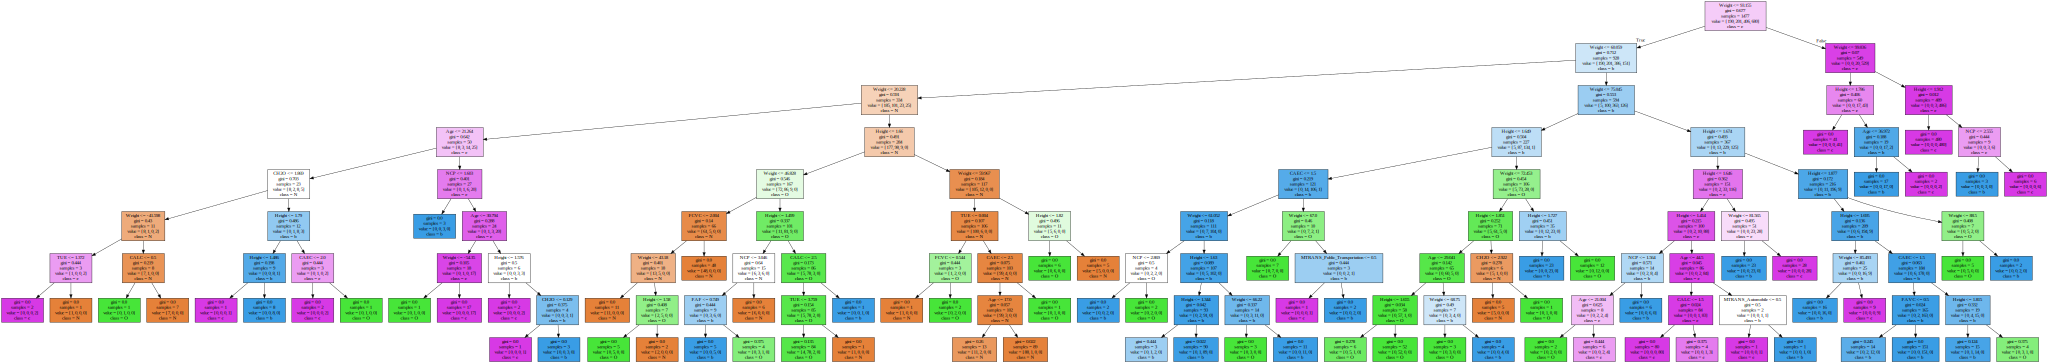

In [22]:
print('[ max_depth가 7인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

의사 결정 나무는 사람이 알아볼 수 있는 rule base 성향을 나타낸다.해당 모델의 Root node 는 Weight <= 93.174의 조건을 가지고 있으므로, 해당 변수가 가장 중요한 분기로 인식되는 것을 확인 할 수 있다. 각 노드에 존재하는 gini 값은 데이터의 통계적 분산 정도를 정량화 한 값으로, leaf node로 진행할 수록 감소 한다. 해당 모델은 prunning이 실행되어, 학습데이터 분리도가 100퍼센트가 아니고, 이에 의해서 leaf node의 gini 값이 0이 아닌 경우가 있는 것을 확인 할 수 있다. 해당 모델에는 여러가지 분류를 하는 rule이 존재하지만, 간단하게 몇가지만 살펴 보자면, 몸무게가 93.174 이상이고, 또 그중에서도 102.0를 넘는다면 해당 모델에서는 '비만'으로 분류한다(samples = 458, value = [0, 0, 0, 458]를 해석하자면, 해당 노드로 들어온 samples 458개중 458개 모두 index = 3 즉 '비만'으로 분류 ). 조금 더 복잡한 rule을 설명해 보자면, 몸무게가 61.514보다 작고, 20.76보다는 무거우면서 키가 1.66 보다 크고, 하루에 신체활동을 하는 빈도가 2.935 보다 높다면 정상체중인 것으로 분류한다.  

## 5) 의사결정 나무의 특징

의사결정 나무는 Explainable 하다는 것이 가장 큰 특징인 것 같다. 다른 모델들은 모델을 만드는 본인도 어떤 과정을 통해서 모델이 결론을 도출해 내는지를 설명하는 것이 어려운 반면, 의사결정 나무는 결정과정을 모두 보여주기 때문에 다른 모델들에 비해 설명에 용이 한것 같다.
또한 의사결정 나무는 이상치에 크게 민감하지 않은 것 같다. 이는 의사결정을 하는 과정에서 기준보다 작은지, 큰지 등과 같은 좀 더 큰 기준으로 결론을 도출하기 때문에 이상치에 큰 영향을 받지 않는다.   
본 데이터에 대해서는 애초에 depth 값이 크지 않아 모든값을 확인하여 최적의 값을 도출하였다. Train data에 너무 과적합 되어 있는경우 너무 세부적인 부분까지 모델이 설명하려는 경향이 생긴다. 따라서 Prunning은 이러한 과적합을 제거하여 기존의 설명력을 유지하는 선에서 보다 보편적인 데이터에 적용할 수 있는 수준으로 진행하는 것이 좋을 것 같다.